Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076922
Confusion Matrix:
[[25  4]
 [ 3 29]]


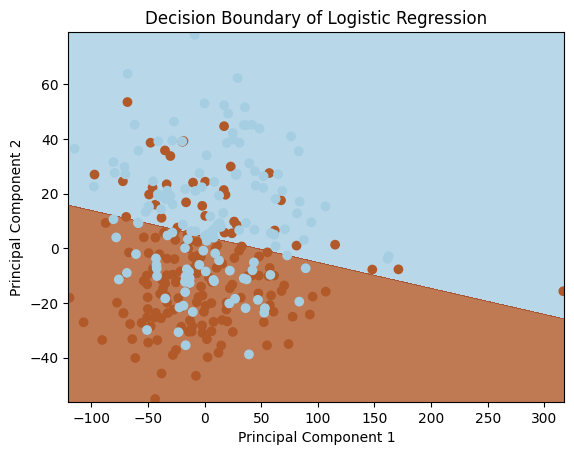

In [3]:
import numpy as np
import pandas as pd
dataset_file_path = 'D:\HDP\heart.csv'

# Read the dataset into a DataFrame using pandas
data = pd.read_csv(dataset_file_path)

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA

# Step 1: Data Preparation
# Assuming your data is loaded into a DataFrame named 'data'
X = data.drop('target', axis=1)
Y = data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Step 3: Model Evaluation
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Step 4: Visualizing Decision Boundary
# As mentioned earlier, we'll use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit the logistic regression model on the reduced data
model_pca = LogisticRegression()
model_pca.fit(X_pca, Y)

# Create a meshgrid to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the meshgrid
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary of Logistic Regression')
plt.show()
